In [ ]:
##### Run this if you're installing Tensorflow for the first time
# !pip install tensorflow

In [ ]:
##### Run this if you're installing Keras for the first time
# !pip install keras

In [1]:
# Statistical Packages
import numpy as np 
import pandas as pd 

# Text Blob and nltk
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re

# Packages required for Neural Networks 
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential
from tqdm import tqdm
import warnings
from keras.preprocessing.sequence import pad_sequences
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
lemmatizer = WordNetLemmatizer()

# Packages Required for Logistic Regression 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score , f1_score
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

#set random seed for the session and also for tensorflow that runs in background for keras
# set_random_seed(123)
# random.seed(123)


Using TensorFlow backend.


In [2]:
##### Loading the dataset
df_train = pd.read_csv("drugsComTrain_raw.csv")
df_test = pd.read_csv("drugsComTest_raw.csv")

In [3]:
print("Shape of the training data- ",df_train.shape)
print("Shape of the testing data- ",df_test.shape)

Shape of the training data-  (161297, 7)
Shape of the testing data-  (53766, 7)


In [4]:
##### Columns present in the testing dataset
df_train.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [5]:
######### Displaying how the reviews look like
df_train['review'].head(5)

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [6]:
reviews = df_train['review']
sentiments = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    sentiments += [blob.sentiment.polarity]

100%|████████████████████████████████████████████████████████████████████████| 161297/161297 [01:52<00:00, 1427.43it/s]


In [7]:
df_train["sentiment"] = sentiments
df_train.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,0.168333
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0.067210
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,0.179545
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,0.194444


In [8]:
row_indexes1=df_train[df_train['rating']>=5.0].index
df_train.loc[row_indexes1,'rating_new']="1"
row_indexes0=df_train[df_train['rating']<5.0].index
df_train.loc[row_indexes0,'rating_new']="0"

In [136]:
row_indexes1=df_test[df_test['rating']>=5.0].index
df_test.loc[row_indexes1,'rating_new']="1"
row_indexes0=df_test[df_test['rating']<5.0].index
df_test.loc[row_indexes0,'rating_new']="0"

In [8]:
df_train['rating_new'] = df_train['rating'].apply(lambda i:1 if i>=5 else 0)


In [9]:
df_test['rating_new'] = df_test['rating'].apply(lambda i:1 if i>=5 else 0)

In [10]:
df_train.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,rating_new_2,rating_new
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,1,1
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,1,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,1,1


In [12]:
df_test.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,rating_new
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,1
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,1
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,1


In [10]:
################## Run the following if you're using nltk for the first time
# import nltk
# nltk.download()
# nltk.download('punkt')
# nltk.download('wordnet')

In [13]:
from tqdm import tqdm

def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['review']):
        
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
            
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
    
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
    
        reviews.append(lemma_words)

    return(reviews)


In [14]:
df_train['tokens'] = clean_sentences(df_train)

100%|████████████████████████████████████████████████████████████████████████| 161297/161297 [02:26<00:00, 1103.67it/s]


In [15]:
df_test['tokens'] = clean_sentences(df_test)

100%|██████████████████████████████████████████████████████████████████████████| 53766/53766 [00:45<00:00, 1179.30it/s]


In [16]:
from nltk.corpus import stopwords
stopword = stopwords.words('english')
negated_words = ['don',"don't",'ain','aren',"aren't",'couldn',"couldn't",
                 'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",
                'against','no','not','no','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',
                 "shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]
stop = []
for w in stopword:
    if w not in negated_words:
        stop.append(w)

In [17]:
def clean(sen):
    return [word for word in sen if word not in stop]

In [18]:
df_train['cleaned']= df_train['tokens'].apply(clean)
df_test['cleaned'] = df_test['tokens'].apply(clean)

In [19]:
df_train.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,rating_new_2,rating_new,tokens,cleaned
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1,1,"[it, ha, no, side, effect, i, take, it, in, co...","[ha, no, side, effect, take, combination, byst..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1,1,"[my, son, is, halfway, through, his, fourth, w...","[son, halfway, fourth, week, intuniv, became, ..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,1,1,"[i, used, to, take, another, oral, contracepti...","[used, take, another, oral, contraceptive, pil..."
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,1,1,"[this, is, my, first, time, using, any, form, ...","[first, time, using, form, birth, control, gla..."
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,1,1,"[suboxone, ha, completely, turned, my, life, a...","[suboxone, ha, completely, turned, life, aroun..."


### LSTM with CNN

In [19]:
############### FOR TRAINING #################
all_training_words = [word for tokens in df_train["cleaned"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in df_train["cleaned"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

6946645 words total, with a vocabulary size of 41914
Max sentence length is 973


In [27]:
############### FOR TESTING ##################
all_testing_words = [word for tokens in df_test["cleaned"] for word in tokens]
testing_sentence_lengths = [len(tokens) for tokens in df_test["cleaned"]]
TESTING_VOCAB = sorted(list(set(all_testing_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_testing_words), len(TESTING_VOCAB)))
print("Max sentence length is %s" % max(testing_sentence_lengths))

2311711 words total, with a vocabulary size of 28119
Max sentence length is 577


In [20]:
############### FOR TRAINING #################
cleaned_2 = []
for i in df_train["cleaned"]:
    text = " ".join(i)
    cleaned_2.append(text)
df_train["cleaned_new"] = cleaned_2

161297


In [113]:
# df_train["cleaned_new"][:15]

In [22]:
############## FOR TESTING ##################
cleaned_2_test = []
for i in df_test["cleaned"]:
    text = " ".join(i)
    cleaned_2_test.append(text)
df_test["cleaned_new"] = cleaned_2_test
print(len(cleaned_2_test))

53766


In [111]:
df_test.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,tokens,cleaned,cleaned_new,rating_new
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,"[i, ve, tried, a, few, antidepressant, over, t...","[tried, antidepressant, year, citalopram, fluo...",tried antidepressant year citalopram fluoxetin...,1
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,"[my, son, ha, crohn, s, disease, and, ha, done...","[son, ha, crohn, disease, ha, done, well, asac...",son ha crohn disease ha done well asacol ha no...,1
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,"[quick, reduction, of, symptom]","[quick, reduction, symptom]",quick reduction symptom,1
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,"[contrave, combine, drug, that, were, used, fo...","[contrave, combine, drug, used, alcohol, smoki...",contrave combine drug used alcohol smoking opi...,1
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,"[i, have, been, on, this, birth, control, for,...","[birth, control, one, cycle, reading, review, ...",birth control one cycle reading review type si...,1


In [28]:
tokenizer_train = Tokenizer(num_words= len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer_train.fit_on_texts(df_train['cleaned_new'].tolist())

In [29]:
sequences_train = tokenizer_train.texts_to_sequences(df_train['cleaned_new'].tolist())
data_train = pad_sequences(sequences_train, maxlen=max(training_sentence_lengths))

In [30]:
tokenizer_test = Tokenizer(num_words= len(TESTING_VOCAB), lower=True, char_level=False)
tokenizer_test.fit_on_texts(df_test['cleaned_new'].tolist())

In [42]:
sequences_test = tokenizer_test.texts_to_sequences(df_test['cleaned_new'].tolist())
data_test = pad_sequences(sequences_test, maxlen=max(training_sentence_lengths))

In [33]:
train_word_index = tokenizer_train.word_index
test_word_index = tokenizer_test.word_index
print('Found %s unique tokens in the traing data set.' % len(train_word_index))
print('Found %s unique tokens in the testing data set.' % len(test_word_index))


Found 41914 unique tokens in the traing data set.
Found 28119 unique tokens in the testing data set.


In [43]:
print("Shape of training data",data_train.shape)
print("Shape of testing data",data_test.shape)

Shape of training data (161297, 973)
Shape of testing data (53766, 973)


In [35]:
# LSTM Model Architecture
model_lstm = Sequential()
model_lstm.add(Embedding(42041, 100, input_length=973))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
train_labels = df_train["rating_new"]

In [ ]:
model_lstm.fit(data, np.array(labels), validation_split=0.3, epochs=1)

In [78]:
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(41914, 100, input_length=973))
    model_conv.add(Dropout(0.2))
    model_conv.add(Conv1D(64, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_conv

In [83]:
# Training the model 
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
model_conv = create_conv_model()
history1 = model_conv.fit(data_train, np.array(train_labels), batch_size=100, validation_split=0.3, epochs = 3,callbacks=[early_stopping_monitor])


C:\Users\19784\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 112907 samples, validate on 48390 samples
Epoch 1/3


 17600/112907 [===>..........................] - ETA: 25:06 - loss: 0.6901 - accuracy: 0.650 - ETA: 21:41 - loss: 0.6818 - accuracy: 0.680 - ETA: 20:29 - loss: 0.6770 - accuracy: 0.673 - ETA: 20:08 - loss: 0.6630 - accuracy: 0.700 - ETA: 20:01 - loss: 0.6527 - accuracy: 0.708 - ETA: 19:47 - loss: 0.6379 - accuracy: 0.720 - ETA: 19:38 - loss: 0.6303 - accuracy: 0.724 - ETA: 19:35 - loss: 0.6260 - accuracy: 0.726 - ETA: 19:30 - loss: 0.6198 - accuracy: 0.728 - ETA: 19:46 - loss: 0.6114 - accuracy: 0.733 - ETA: 20:08 - loss: 0.6045 - accuracy: 0.736 - ETA: 20:20 - loss: 0.6060 - accuracy: 0.733 - ETA: 20:29 - loss: 0.6015 - accuracy: 0.735 - ETA: 20:36 - loss: 0.5993 - accuracy: 0.735 - ETA: 20:44 - loss: 0.5951 - accuracy: 0.738 - ETA: 20:54 - loss: 0.5927 - accuracy: 0.740 - ETA: 20:59 - loss: 0.5871 - accuracy: 0.744 - ETA: 21:05 - loss: 0.5906 - accuracy: 0.740 - ETA: 21:18 - loss: 0.5885 - accuracy: 0.741 - ETA: 21:23 - loss: 0.5852 - accuracy: 0.743 - ETA: 21:32 - loss: 0.5815 - acc

 53200/112907 [=============>................] - ETA: 18:44 - loss: 0.4364 - accuracy: 0.799 - ETA: 18:42 - loss: 0.4360 - accuracy: 0.799 - ETA: 18:41 - loss: 0.4360 - accuracy: 0.799 - ETA: 18:39 - loss: 0.4355 - accuracy: 0.800 - ETA: 18:38 - loss: 0.4353 - accuracy: 0.800 - ETA: 18:37 - loss: 0.4350 - accuracy: 0.800 - ETA: 18:35 - loss: 0.4348 - accuracy: 0.800 - ETA: 18:34 - loss: 0.4348 - accuracy: 0.800 - ETA: 18:32 - loss: 0.4349 - accuracy: 0.800 - ETA: 18:31 - loss: 0.4351 - accuracy: 0.800 - ETA: 18:30 - loss: 0.4349 - accuracy: 0.800 - ETA: 18:29 - loss: 0.4347 - accuracy: 0.800 - ETA: 18:28 - loss: 0.4345 - accuracy: 0.800 - ETA: 18:27 - loss: 0.4345 - accuracy: 0.800 - ETA: 18:26 - loss: 0.4343 - accuracy: 0.800 - ETA: 18:26 - loss: 0.4340 - accuracy: 0.800 - ETA: 18:27 - loss: 0.4337 - accuracy: 0.801 - ETA: 18:27 - loss: 0.4334 - accuracy: 0.801 - ETA: 18:27 - loss: 0.4334 - accuracy: 0.801 - ETA: 18:26 - loss: 0.4331 - accuracy: 0.801 - ETA: 18:25 - loss: 0.4331 - acc

 71000/112907 [=================>............] - ETA: 14:35 - loss: 0.4123 - accuracy: 0.812 - ETA: 14:34 - loss: 0.4121 - accuracy: 0.812 - ETA: 14:32 - loss: 0.4119 - accuracy: 0.812 - ETA: 14:31 - loss: 0.4117 - accuracy: 0.813 - ETA: 14:30 - loss: 0.4118 - accuracy: 0.813 - ETA: 14:29 - loss: 0.4117 - accuracy: 0.813 - ETA: 14:28 - loss: 0.4114 - accuracy: 0.813 - ETA: 14:26 - loss: 0.4114 - accuracy: 0.813 - ETA: 14:25 - loss: 0.4114 - accuracy: 0.813 - ETA: 14:23 - loss: 0.4112 - accuracy: 0.813 - ETA: 14:22 - loss: 0.4112 - accuracy: 0.813 - ETA: 14:20 - loss: 0.4110 - accuracy: 0.813 - ETA: 14:19 - loss: 0.4108 - accuracy: 0.813 - ETA: 14:18 - loss: 0.4107 - accuracy: 0.813 - ETA: 14:17 - loss: 0.4105 - accuracy: 0.813 - ETA: 14:15 - loss: 0.4103 - accuracy: 0.813 - ETA: 14:14 - loss: 0.4104 - accuracy: 0.813 - ETA: 14:13 - loss: 0.4101 - accuracy: 0.813 - ETA: 14:11 - loss: 0.4102 - accuracy: 0.813 - ETA: 14:10 - loss: 0.4099 - accuracy: 0.814 - ETA: 14:08 - loss: 0.4099 - acc

 89500/112907 [======================>.......] - ETA: 10:14 - loss: 0.3962 - accuracy: 0.821 - ETA: 10:12 - loss: 0.3960 - accuracy: 0.821 - ETA: 10:11 - loss: 0.3959 - accuracy: 0.821 - ETA: 10:09 - loss: 0.3960 - accuracy: 0.821 - ETA: 10:08 - loss: 0.3959 - accuracy: 0.821 - ETA: 10:06 - loss: 0.3958 - accuracy: 0.821 - ETA: 10:05 - loss: 0.3958 - accuracy: 0.822 - ETA: 10:04 - loss: 0.3956 - accuracy: 0.822 - ETA: 10:02 - loss: 0.3956 - accuracy: 0.822 - ETA: 10:01 - loss: 0.3955 - accuracy: 0.822 - ETA: 9:59 - loss: 0.3954 - accuracy: 0.822 - ETA: 9:58 - loss: 0.3955 - accuracy: 0.82 - ETA: 9:56 - loss: 0.3954 - accuracy: 0.82 - ETA: 9:55 - loss: 0.3952 - accuracy: 0.82 - ETA: 9:53 - loss: 0.3951 - accuracy: 0.82 - ETA: 9:51 - loss: 0.3951 - accuracy: 0.82 - ETA: 9:50 - loss: 0.3951 - accuracy: 0.82 - ETA: 9:49 - loss: 0.3951 - accuracy: 0.82 - ETA: 9:47 - loss: 0.3951 - accuracy: 0.82 - ETA: 9:46 - loss: 0.3951 - accuracy: 0.82 - ETA: 9:44 - loss: 0.3950 - accuracy: 0.82 - ETA: 9

108100/112907 [===========================>..] - ETA: 5:40 - loss: 0.3838 - accuracy: 0.82 - ETA: 5:38 - loss: 0.3837 - accuracy: 0.82 - ETA: 5:37 - loss: 0.3836 - accuracy: 0.82 - ETA: 5:35 - loss: 0.3836 - accuracy: 0.82 - ETA: 5:34 - loss: 0.3836 - accuracy: 0.82 - ETA: 5:32 - loss: 0.3835 - accuracy: 0.82 - ETA: 5:31 - loss: 0.3835 - accuracy: 0.82 - ETA: 5:29 - loss: 0.3834 - accuracy: 0.82 - ETA: 5:28 - loss: 0.3833 - accuracy: 0.82 - ETA: 5:26 - loss: 0.3833 - accuracy: 0.82 - ETA: 5:25 - loss: 0.3833 - accuracy: 0.82 - ETA: 5:23 - loss: 0.3832 - accuracy: 0.82 - ETA: 5:22 - loss: 0.3833 - accuracy: 0.82 - ETA: 5:20 - loss: 0.3832 - accuracy: 0.82 - ETA: 5:19 - loss: 0.3831 - accuracy: 0.82 - ETA: 5:17 - loss: 0.3829 - accuracy: 0.82 - ETA: 5:16 - loss: 0.3829 - accuracy: 0.82 - ETA: 5:14 - loss: 0.3828 - accuracy: 0.82 - ETA: 5:13 - loss: 0.3828 - accuracy: 0.82 - ETA: 5:11 - loss: 0.3827 - accuracy: 0.82 - ETA: 5:10 - loss: 0.3827 - accuracy: 0.82 - ETA: 5:08 - loss: 0.3826 - 

112907/112907 [==============================] - ETA: 1:08 - loss: 0.3744 - accuracy: 0.83 - ETA: 1:06 - loss: 0.3743 - accuracy: 0.83 - ETA: 1:05 - loss: 0.3742 - accuracy: 0.83 - ETA: 1:03 - loss: 0.3741 - accuracy: 0.83 - ETA: 1:02 - loss: 0.3740 - accuracy: 0.83 - ETA: 1:00 - loss: 0.3740 - accuracy: 0.83 - ETA: 59s - loss: 0.3739 - accuracy: 0.8340 - ETA: 58s - loss: 0.3739 - accuracy: 0.834 - ETA: 56s - loss: 0.3738 - accuracy: 0.834 - ETA: 55s - loss: 0.3738 - accuracy: 0.834 - ETA: 53s - loss: 0.3738 - accuracy: 0.834 - ETA: 52s - loss: 0.3738 - accuracy: 0.834 - ETA: 50s - loss: 0.3738 - accuracy: 0.834 - ETA: 49s - loss: 0.3737 - accuracy: 0.834 - ETA: 47s - loss: 0.3736 - accuracy: 0.834 - ETA: 46s - loss: 0.3736 - accuracy: 0.834 - ETA: 44s - loss: 0.3736 - accuracy: 0.834 - ETA: 43s - loss: 0.3735 - accuracy: 0.834 - ETA: 42s - loss: 0.3736 - accuracy: 0.834 - ETA: 40s - loss: 0.3735 - accuracy: 0.834 - ETA: 39s - loss: 0.3735 - accuracy: 0.834 - ETA: 37s - loss: 0.3734 - 

 17800/112907 [===>..........................] - ETA: 21:27 - loss: 0.2084 - accuracy: 0.930 - ETA: 21:53 - loss: 0.2766 - accuracy: 0.890 - ETA: 22:05 - loss: 0.2616 - accuracy: 0.893 - ETA: 22:41 - loss: 0.2627 - accuracy: 0.897 - ETA: 22:37 - loss: 0.2446 - accuracy: 0.906 - ETA: 22:38 - loss: 0.2496 - accuracy: 0.908 - ETA: 22:39 - loss: 0.2379 - accuracy: 0.914 - ETA: 22:38 - loss: 0.2282 - accuracy: 0.917 - ETA: 22:36 - loss: 0.2341 - accuracy: 0.913 - ETA: 22:34 - loss: 0.2346 - accuracy: 0.911 - ETA: 22:50 - loss: 0.2487 - accuracy: 0.905 - ETA: 23:05 - loss: 0.2561 - accuracy: 0.902 - ETA: 23:15 - loss: 0.2560 - accuracy: 0.902 - ETA: 23:17 - loss: 0.2527 - accuracy: 0.902 - ETA: 23:15 - loss: 0.2554 - accuracy: 0.900 - ETA: 23:15 - loss: 0.2608 - accuracy: 0.898 - ETA: 23:12 - loss: 0.2600 - accuracy: 0.900 - ETA: 23:09 - loss: 0.2561 - accuracy: 0.901 - ETA: 23:05 - loss: 0.2587 - accuracy: 0.900 - ETA: 23:01 - loss: 0.2625 - accuracy: 0.896 - ETA: 23:00 - loss: 0.2661 - acc

 53400/112907 [=============>................] - ETA: 16:16 - loss: 0.2649 - accuracy: 0.890 - ETA: 16:14 - loss: 0.2650 - accuracy: 0.890 - ETA: 16:13 - loss: 0.2651 - accuracy: 0.890 - ETA: 16:12 - loss: 0.2650 - accuracy: 0.890 - ETA: 16:11 - loss: 0.2651 - accuracy: 0.890 - ETA: 16:09 - loss: 0.2654 - accuracy: 0.890 - ETA: 16:08 - loss: 0.2653 - accuracy: 0.890 - ETA: 16:07 - loss: 0.2652 - accuracy: 0.890 - ETA: 16:06 - loss: 0.2652 - accuracy: 0.890 - ETA: 16:04 - loss: 0.2652 - accuracy: 0.890 - ETA: 16:03 - loss: 0.2650 - accuracy: 0.890 - ETA: 16:02 - loss: 0.2650 - accuracy: 0.890 - ETA: 16:00 - loss: 0.2650 - accuracy: 0.890 - ETA: 15:59 - loss: 0.2648 - accuracy: 0.890 - ETA: 15:58 - loss: 0.2647 - accuracy: 0.890 - ETA: 15:56 - loss: 0.2648 - accuracy: 0.890 - ETA: 15:55 - loss: 0.2650 - accuracy: 0.890 - ETA: 15:53 - loss: 0.2648 - accuracy: 0.890 - ETA: 15:52 - loss: 0.2646 - accuracy: 0.890 - ETA: 15:51 - loss: 0.2646 - accuracy: 0.890 - ETA: 15:49 - loss: 0.2646 - acc

 71300/112907 [=================>............] - ETA: 12:44 - loss: 0.2642 - accuracy: 0.889 - ETA: 12:43 - loss: 0.2641 - accuracy: 0.889 - ETA: 12:42 - loss: 0.2640 - accuracy: 0.889 - ETA: 12:41 - loss: 0.2639 - accuracy: 0.889 - ETA: 12:40 - loss: 0.2639 - accuracy: 0.889 - ETA: 12:39 - loss: 0.2638 - accuracy: 0.889 - ETA: 12:38 - loss: 0.2637 - accuracy: 0.889 - ETA: 12:37 - loss: 0.2636 - accuracy: 0.889 - ETA: 12:36 - loss: 0.2636 - accuracy: 0.889 - ETA: 12:35 - loss: 0.2634 - accuracy: 0.890 - ETA: 12:34 - loss: 0.2635 - accuracy: 0.889 - ETA: 12:33 - loss: 0.2634 - accuracy: 0.889 - ETA: 12:31 - loss: 0.2634 - accuracy: 0.890 - ETA: 12:30 - loss: 0.2634 - accuracy: 0.890 - ETA: 12:29 - loss: 0.2633 - accuracy: 0.890 - ETA: 12:28 - loss: 0.2635 - accuracy: 0.889 - ETA: 12:26 - loss: 0.2634 - accuracy: 0.889 - ETA: 12:25 - loss: 0.2635 - accuracy: 0.889 - ETA: 12:23 - loss: 0.2634 - accuracy: 0.889 - ETA: 12:22 - loss: 0.2636 - accuracy: 0.889 - ETA: 12:21 - loss: 0.2637 - acc

 89900/112907 [======================>.......] - ETA: 9:09 - loss: 0.2632 - accuracy: 0.89 - ETA: 9:07 - loss: 0.2631 - accuracy: 0.89 - ETA: 9:07 - loss: 0.2633 - accuracy: 0.89 - ETA: 9:06 - loss: 0.2633 - accuracy: 0.89 - ETA: 9:04 - loss: 0.2632 - accuracy: 0.89 - ETA: 9:03 - loss: 0.2632 - accuracy: 0.89 - ETA: 9:02 - loss: 0.2632 - accuracy: 0.89 - ETA: 9:01 - loss: 0.2632 - accuracy: 0.89 - ETA: 9:00 - loss: 0.2633 - accuracy: 0.89 - ETA: 8:59 - loss: 0.2632 - accuracy: 0.89 - ETA: 8:57 - loss: 0.2632 - accuracy: 0.89 - ETA: 8:56 - loss: 0.2632 - accuracy: 0.89 - ETA: 8:55 - loss: 0.2633 - accuracy: 0.89 - ETA: 8:54 - loss: 0.2632 - accuracy: 0.89 - ETA: 8:52 - loss: 0.2631 - accuracy: 0.89 - ETA: 8:51 - loss: 0.2632 - accuracy: 0.89 - ETA: 8:50 - loss: 0.2631 - accuracy: 0.89 - ETA: 8:49 - loss: 0.2631 - accuracy: 0.89 - ETA: 8:47 - loss: 0.2631 - accuracy: 0.89 - ETA: 8:46 - loss: 0.2631 - accuracy: 0.89 - ETA: 8:45 - loss: 0.2630 - accuracy: 0.89 - ETA: 8:43 - loss: 0.2630 - 

108500/112907 [===========================>..] - ETA: 5:11 - loss: 0.2599 - accuracy: 0.89 - ETA: 5:10 - loss: 0.2600 - accuracy: 0.89 - ETA: 5:08 - loss: 0.2600 - accuracy: 0.89 - ETA: 5:07 - loss: 0.2600 - accuracy: 0.89 - ETA: 5:06 - loss: 0.2599 - accuracy: 0.89 - ETA: 5:04 - loss: 0.2599 - accuracy: 0.89 - ETA: 5:03 - loss: 0.2598 - accuracy: 0.89 - ETA: 5:02 - loss: 0.2598 - accuracy: 0.89 - ETA: 5:00 - loss: 0.2597 - accuracy: 0.89 - ETA: 4:59 - loss: 0.2597 - accuracy: 0.89 - ETA: 4:58 - loss: 0.2598 - accuracy: 0.89 - ETA: 4:56 - loss: 0.2599 - accuracy: 0.89 - ETA: 4:55 - loss: 0.2599 - accuracy: 0.89 - ETA: 4:54 - loss: 0.2599 - accuracy: 0.89 - ETA: 4:52 - loss: 0.2600 - accuracy: 0.89 - ETA: 4:51 - loss: 0.2600 - accuracy: 0.89 - ETA: 4:50 - loss: 0.2600 - accuracy: 0.89 - ETA: 4:48 - loss: 0.2600 - accuracy: 0.89 - ETA: 4:47 - loss: 0.2601 - accuracy: 0.89 - ETA: 4:46 - loss: 0.2600 - accuracy: 0.89 - ETA: 4:44 - loss: 0.2600 - accuracy: 0.89 - ETA: 4:43 - loss: 0.2600 - 

112907/112907 [==============================] - ETA: 59s - loss: 0.2586 - accuracy: 0.8928 - ETA: 58s - loss: 0.2586 - accuracy: 0.892 - ETA: 57s - loss: 0.2586 - accuracy: 0.892 - ETA: 55s - loss: 0.2587 - accuracy: 0.892 - ETA: 54s - loss: 0.2587 - accuracy: 0.892 - ETA: 52s - loss: 0.2588 - accuracy: 0.892 - ETA: 51s - loss: 0.2588 - accuracy: 0.892 - ETA: 50s - loss: 0.2588 - accuracy: 0.892 - ETA: 48s - loss: 0.2588 - accuracy: 0.892 - ETA: 47s - loss: 0.2587 - accuracy: 0.892 - ETA: 45s - loss: 0.2587 - accuracy: 0.892 - ETA: 44s - loss: 0.2587 - accuracy: 0.892 - ETA: 43s - loss: 0.2588 - accuracy: 0.892 - ETA: 41s - loss: 0.2588 - accuracy: 0.892 - ETA: 40s - loss: 0.2587 - accuracy: 0.892 - ETA: 39s - loss: 0.2588 - accuracy: 0.892 - ETA: 37s - loss: 0.2587 - accuracy: 0.892 - ETA: 36s - loss: 0.2588 - accuracy: 0.892 - ETA: 34s - loss: 0.2588 - accuracy: 0.892 - ETA: 33s - loss: 0.2588 - accuracy: 0.892 - ETA: 32s - loss: 0.2588 - accuracy: 0.892 - ETA: 30s - loss: 0.2588 - 

 17800/112907 [===>..........................] - ETA: 25:31 - loss: 0.1405 - accuracy: 0.940 - ETA: 25:16 - loss: 0.1403 - accuracy: 0.945 - ETA: 25:07 - loss: 0.1415 - accuracy: 0.946 - ETA: 25:27 - loss: 0.1513 - accuracy: 0.947 - ETA: 25:21 - loss: 0.1426 - accuracy: 0.948 - ETA: 25:39 - loss: 0.1413 - accuracy: 0.948 - ETA: 25:34 - loss: 0.1402 - accuracy: 0.951 - ETA: 25:05 - loss: 0.1408 - accuracy: 0.952 - ETA: 24:44 - loss: 0.1487 - accuracy: 0.946 - ETA: 24:29 - loss: 0.1524 - accuracy: 0.942 - ETA: 24:26 - loss: 0.1602 - accuracy: 0.938 - ETA: 24:20 - loss: 0.1610 - accuracy: 0.937 - ETA: 24:20 - loss: 0.1581 - accuracy: 0.938 - ETA: 24:18 - loss: 0.1588 - accuracy: 0.940 - ETA: 24:13 - loss: 0.1600 - accuracy: 0.940 - ETA: 24:05 - loss: 0.1612 - accuracy: 0.938 - ETA: 23:57 - loss: 0.1603 - accuracy: 0.938 - ETA: 23:56 - loss: 0.1630 - accuracy: 0.937 - ETA: 23:54 - loss: 0.1626 - accuracy: 0.937 - ETA: 23:48 - loss: 0.1671 - accuracy: 0.934 - ETA: 23:43 - loss: 0.1674 - acc

 53400/112907 [=============>................] - ETA: 15:58 - loss: 0.1640 - accuracy: 0.936 - ETA: 15:57 - loss: 0.1642 - accuracy: 0.936 - ETA: 15:56 - loss: 0.1641 - accuracy: 0.936 - ETA: 15:55 - loss: 0.1645 - accuracy: 0.936 - ETA: 15:53 - loss: 0.1645 - accuracy: 0.936 - ETA: 15:52 - loss: 0.1646 - accuracy: 0.936 - ETA: 15:51 - loss: 0.1649 - accuracy: 0.935 - ETA: 15:49 - loss: 0.1647 - accuracy: 0.936 - ETA: 15:48 - loss: 0.1645 - accuracy: 0.936 - ETA: 15:48 - loss: 0.1643 - accuracy: 0.936 - ETA: 15:47 - loss: 0.1643 - accuracy: 0.936 - ETA: 15:46 - loss: 0.1642 - accuracy: 0.936 - ETA: 15:45 - loss: 0.1641 - accuracy: 0.936 - ETA: 15:44 - loss: 0.1641 - accuracy: 0.936 - ETA: 15:43 - loss: 0.1641 - accuracy: 0.936 - ETA: 15:41 - loss: 0.1640 - accuracy: 0.936 - ETA: 15:40 - loss: 0.1639 - accuracy: 0.936 - ETA: 15:39 - loss: 0.1640 - accuracy: 0.936 - ETA: 15:38 - loss: 0.1640 - accuracy: 0.936 - ETA: 15:37 - loss: 0.1639 - accuracy: 0.936 - ETA: 15:35 - loss: 0.1638 - acc

 71300/112907 [=================>............] - ETA: 12:40 - loss: 0.1642 - accuracy: 0.936 - ETA: 12:39 - loss: 0.1641 - accuracy: 0.936 - ETA: 12:39 - loss: 0.1641 - accuracy: 0.936 - ETA: 12:38 - loss: 0.1641 - accuracy: 0.936 - ETA: 12:36 - loss: 0.1642 - accuracy: 0.936 - ETA: 12:36 - loss: 0.1644 - accuracy: 0.935 - ETA: 12:35 - loss: 0.1643 - accuracy: 0.936 - ETA: 12:34 - loss: 0.1641 - accuracy: 0.936 - ETA: 12:33 - loss: 0.1640 - accuracy: 0.936 - ETA: 12:32 - loss: 0.1641 - accuracy: 0.936 - ETA: 12:31 - loss: 0.1642 - accuracy: 0.935 - ETA: 12:30 - loss: 0.1642 - accuracy: 0.936 - ETA: 12:29 - loss: 0.1641 - accuracy: 0.936 - ETA: 12:28 - loss: 0.1640 - accuracy: 0.936 - ETA: 12:27 - loss: 0.1640 - accuracy: 0.936 - ETA: 12:26 - loss: 0.1640 - accuracy: 0.936 - ETA: 12:25 - loss: 0.1640 - accuracy: 0.936 - ETA: 12:23 - loss: 0.1638 - accuracy: 0.936 - ETA: 12:22 - loss: 0.1640 - accuracy: 0.936 - ETA: 12:21 - loss: 0.1639 - accuracy: 0.936 - ETA: 12:20 - loss: 0.1639 - acc

 89900/112907 [======================>.......] - ETA: 9:07 - loss: 0.1658 - accuracy: 0.93 - ETA: 9:06 - loss: 0.1658 - accuracy: 0.93 - ETA: 9:05 - loss: 0.1657 - accuracy: 0.93 - ETA: 9:04 - loss: 0.1658 - accuracy: 0.93 - ETA: 9:02 - loss: 0.1658 - accuracy: 0.93 - ETA: 9:01 - loss: 0.1658 - accuracy: 0.93 - ETA: 9:00 - loss: 0.1657 - accuracy: 0.93 - ETA: 8:59 - loss: 0.1657 - accuracy: 0.93 - ETA: 8:57 - loss: 0.1658 - accuracy: 0.93 - ETA: 8:56 - loss: 0.1658 - accuracy: 0.93 - ETA: 8:55 - loss: 0.1658 - accuracy: 0.93 - ETA: 8:54 - loss: 0.1658 - accuracy: 0.93 - ETA: 8:53 - loss: 0.1657 - accuracy: 0.93 - ETA: 8:51 - loss: 0.1657 - accuracy: 0.93 - ETA: 8:50 - loss: 0.1657 - accuracy: 0.93 - ETA: 8:49 - loss: 0.1658 - accuracy: 0.93 - ETA: 8:48 - loss: 0.1657 - accuracy: 0.93 - ETA: 8:47 - loss: 0.1657 - accuracy: 0.93 - ETA: 8:45 - loss: 0.1658 - accuracy: 0.93 - ETA: 8:44 - loss: 0.1658 - accuracy: 0.93 - ETA: 8:43 - loss: 0.1658 - accuracy: 0.93 - ETA: 8:42 - loss: 0.1658 - 

108500/112907 [===========================>..] - ETA: 5:04 - loss: 0.1671 - accuracy: 0.93 - ETA: 5:02 - loss: 0.1671 - accuracy: 0.93 - ETA: 5:01 - loss: 0.1671 - accuracy: 0.93 - ETA: 5:00 - loss: 0.1671 - accuracy: 0.93 - ETA: 4:58 - loss: 0.1671 - accuracy: 0.93 - ETA: 4:57 - loss: 0.1670 - accuracy: 0.93 - ETA: 4:56 - loss: 0.1671 - accuracy: 0.93 - ETA: 4:54 - loss: 0.1671 - accuracy: 0.93 - ETA: 4:53 - loss: 0.1672 - accuracy: 0.93 - ETA: 4:52 - loss: 0.1673 - accuracy: 0.93 - ETA: 4:51 - loss: 0.1673 - accuracy: 0.93 - ETA: 4:49 - loss: 0.1673 - accuracy: 0.93 - ETA: 4:48 - loss: 0.1673 - accuracy: 0.93 - ETA: 4:47 - loss: 0.1674 - accuracy: 0.93 - ETA: 4:45 - loss: 0.1674 - accuracy: 0.93 - ETA: 4:44 - loss: 0.1674 - accuracy: 0.93 - ETA: 4:43 - loss: 0.1675 - accuracy: 0.93 - ETA: 4:41 - loss: 0.1675 - accuracy: 0.93 - ETA: 4:40 - loss: 0.1675 - accuracy: 0.93 - ETA: 4:39 - loss: 0.1676 - accuracy: 0.93 - ETA: 4:38 - loss: 0.1676 - accuracy: 0.93 - ETA: 4:36 - loss: 0.1675 - 

112907/112907 [==============================] - ETA: 58s - loss: 0.1686 - accuracy: 0.934 - ETA: 56s - loss: 0.1686 - accuracy: 0.934 - ETA: 55s - loss: 0.1686 - accuracy: 0.934 - ETA: 54s - loss: 0.1687 - accuracy: 0.934 - ETA: 52s - loss: 0.1687 - accuracy: 0.934 - ETA: 51s - loss: 0.1688 - accuracy: 0.934 - ETA: 49s - loss: 0.1688 - accuracy: 0.934 - ETA: 48s - loss: 0.1689 - accuracy: 0.934 - ETA: 47s - loss: 0.1689 - accuracy: 0.934 - ETA: 45s - loss: 0.1689 - accuracy: 0.934 - ETA: 44s - loss: 0.1689 - accuracy: 0.934 - ETA: 43s - loss: 0.1689 - accuracy: 0.934 - ETA: 41s - loss: 0.1689 - accuracy: 0.934 - ETA: 40s - loss: 0.1688 - accuracy: 0.934 - ETA: 39s - loss: 0.1688 - accuracy: 0.934 - ETA: 37s - loss: 0.1688 - accuracy: 0.934 - ETA: 36s - loss: 0.1689 - accuracy: 0.934 - ETA: 35s - loss: 0.1689 - accuracy: 0.934 - ETA: 33s - loss: 0.1690 - accuracy: 0.934 - ETA: 32s - loss: 0.1690 - accuracy: 0.934 - ETA: 31s - loss: 0.1691 - accuracy: 0.934 - ETA: 29s - loss: 0.1691 - a

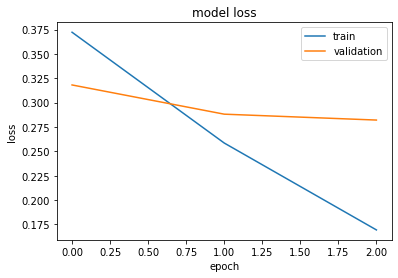

In [91]:
plt.plot(history1.history['loss'],label='train')
plt.plot(history1.history['val_loss'],label='validation')
plt.legend()
plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.savefig('rcnn_model_loss.png')

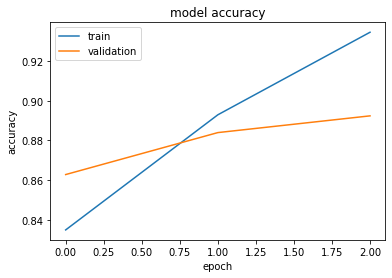

In [92]:
plt.plot(history1.history['accuracy'],label='train')
plt.plot(history1.history['val_accuracy'],label='validation')
plt.title('model accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('rcnn_model_accuracy.png')

In [97]:
# Computing the same for Test Dataset
train_y_predictions = model_conv.predict(data_train)
train_y_predictions

array([[0.9905355 ],
       [0.99429476],
       [0.96409404],
       ...,
       [0.04212382],
       [0.99624944],
       [0.99496067]], dtype=float32)

In [98]:
# Binarizing the output of the neural network
train_y_predictions[train_y_predictions >= 0.5] = 1
train_y_predictions[train_y_predictions < 0.5] = 0

In [99]:
train_y_predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [93]:
# CNN_train_accuracy = accuracy_score(train_labels,train_y_predictions)
# CNN_train_accuracy
# from sklearn.metrics import confusion_matrix
# test_y = df_test['rating_new']
# cm1 = confusion_matrix(train_y_predictions,train_labels )
# print (cm1)

In [100]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [106]:
# Computing the same for Test Dataset
test_y_predictions = model_conv.predict(data_test)
test_y_predictions

array([[0.9445709 ],
       [0.91367817],
       [0.6461806 ],
       ...,
       [0.9788972 ],
       [0.03892138],
       [0.7923496 ]], dtype=float32)

In [107]:
print (type(test_y_predictions))

<class 'numpy.ndarray'>


In [108]:
# Binarizing the output of the neural network
test_y_predictions[test_y_predictions >= 0.5] = 1
test_y_predictions[test_y_predictions < 0.5] = 0
test_y_predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [109]:
from sklearn.metrics import confusion_matrix
test_y = df_test['rating_new']
cm = confusion_matrix(test_y_predictions,test_y )
print (cm)

[[ 3136  5473]
 [10361 34796]]


In [110]:
CNN_test_accuracy = accuracy_score(test_y,test_y_predictions)
CNN_test_accuracy

0.7055016181229773

In [64]:
accuracy_test = model_conv.evaluate(data_test,test_y)
accuracy_test

26080/53766 [=============>................] - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA

52672/53766 [============================>.] - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA

53766/53766 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 148s 3ms/step


[0.632078894972912, 0.7198229432106018]

### Logistic Regression

In [20]:
con_vec = TfidfVectorizer(min_df=5, max_df= 0.8,sublinear_tf=True,use_idf=True)
X_train = con_vec.fit_transform(df_train['review'])
y_train = df_train["rating_new_2"]
X_test = con_vec.transform(df_test['review'])
y_test = df_test['rating_new']

print("Training X shape- ",X_train.shape)
print("Testing X shape- ",X_test.shape)
print("Training Y shape- ",y_train.shape)
print("Testing Y shape- ",y_test.shape)

Training X shape-  (161297, 19181)
Testing X shape-  (53766, 19181)
Training Y shape-  (161297,)
Testing Y shape-  (53766,)


In [21]:
lr = LogisticRegression(penalty='l1')
lr.fit(X_train,y_train)
y_train_predict = lr.predict(X_train)

C:\Users\19784\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
Training_accuracy = accuracy_score(y_train,y_train_predict)
print("Accuracy-", Training_accuracy)

Accuracy- 0.8732772463220023


In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


Training_precision = precision_score(y_train,y_train_predict)
Training_recall = recall_score(y_train,y_train_predict)
Training_f1 = f1_score(y_train,y_train_predict)
print ("**** Logistic Rgression Metrics(Training) ****")
print("Accuracy-", Training_accuracy)
print("Error-", 1-Training_accuracy)
print("Precision- ", Training_precision)
print("Recall- ",Training_recall)
print("F1 Score- ", Training_f1)

**** Logistic Rgression Metrics(Training) ****
Accuracy- 0.8732772463220023
Error- 0.12672275367799768
Precision-  0.8924043732868179
Recall-  0.9453647027767237
F1 Score-  0.9181214398448955


AUC: 0.80


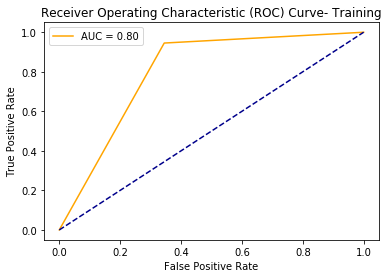

In [39]:
auc = roc_auc_score(y_train,y_train_predict)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_train,y_train_predict)

# plot_roc_curve(fpr, tpr)
plt.plot(fpr, tpr, color='orange', label = 'AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve- Training')
plt.legend()
plt.savefig('logistic_roc_train.png')
plt.show()

In [25]:
y_test_predict = lr.predict(X_test)

In [27]:
print(type(y_test[10]))

<class 'numpy.int64'>


In [33]:
Testing_accuracy = accuracy_score(y_test,y_test_predict)
Testing_precision = precision_score(y_test,y_test_predict)
Testing_recall = recall_score(y_test,y_test_predict)
Testing_f1 = f1_score(y_test,y_test_predict)
print ("**** Logistic Rgression Metrics(Testing) ****")
print("Accuracy-", Testing_accuracy)
print("Error-",1-Testing_accuracy)
print("Precision- ", Testing_precision)
print("Recall- ",Testing_recall)
print("F1 Score- ", Testing_f1)

**** Logistic Rgression Metrics(Testing) ****
Accuracy- 0.8615481903061414
Error- 0.13845180969385862
Precision-  0.8841787411343367
Recall-  0.9380168367727035
F1 Score-  0.9103024460778407


AUC: 0.79


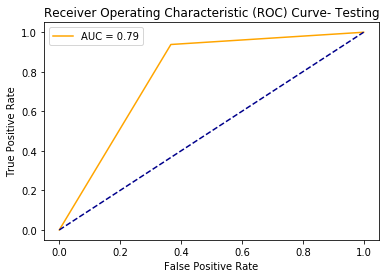

In [40]:
auc = roc_auc_score(y_test,y_test_predict)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test,y_test_predict)

# plot_roc_curve(fpr, tpr)
plt.plot(fpr, tpr, color='orange', label = 'AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve- Testing')
plt.legend()
plt.savefig('logistic_roc_testing.png')
plt.show()